<a href="https://colab.research.google.com/github/Gops03/PROSESAMIENTO_DIGITAL_DE_SE-ALES/blob/main/FourierNoUniforme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento de Señales No Uniformemente Muestreadas
**Universidad Nacional de Colombia - Ingeniería Electrónica**  
**Curso: Procesamiento Digital de Señales (PDS)**  
**Tema: Transformada de Fourier para señales no uniformemente muestreadas**  
Autor: *Estudiante UNAL 9/10*

Este cuaderno muestra cómo analizar una señal muestreada en tiempos no uniformes usando dos métodos:

1. Interpolación + FFT
2. Periodograma de Lomb-Scargle

---



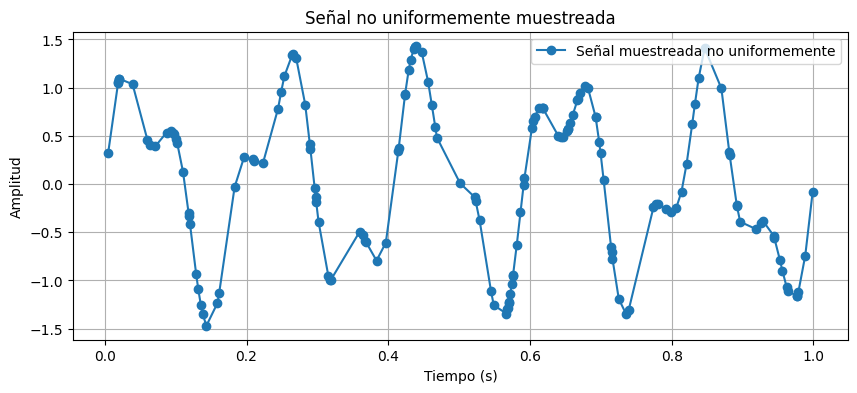

In [2]:
# ============================================
# Procesamiento de señales no uniformemente muestreadas
# ============================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import lombscargle

# --------------------------------------------
# 1. Crear una señal continua simulada
# --------------------------------------------
def señal_original(t):
    # Señal compuesta por dos senoidales
    return np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 12 * t)

# Crear un vector de tiempo no uniformemente muestreado
np.random.seed(0)
t_no_uniforme = np.sort(np.random.rand(150))  # 150 muestras en el rango [0, 1]
x_no_uniforme = señal_original(t_no_uniforme)

# Visualizar la señal original no uniformemente muestreada
plt.figure(figsize=(10, 4))
plt.plot(t_no_uniforme, x_no_uniforme, 'o-', label='Señal muestreada no uniformemente')
plt.title("Señal no uniformemente muestreada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()


## Método 1: Interpolación + FFT

Interpolamos la señal para convertirla a una grilla de tiempo uniforme y luego aplicamos la Transformada Rápida de Fourier (FFT).


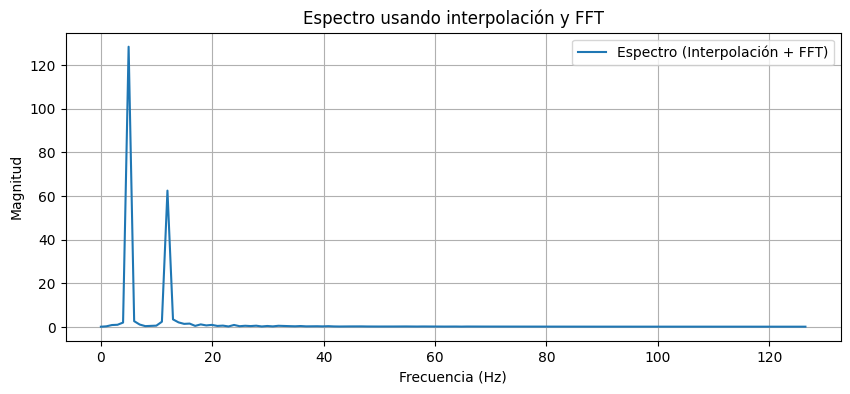

In [3]:
# Crear una grilla de tiempo uniforme
t_uniforme = np.linspace(0, 1, 256)
interpolador = interp1d(t_no_uniforme, x_no_uniforme, kind='cubic', fill_value="extrapolate")
x_interpolada = interpolador(t_uniforme)

# Calcular la FFT
X_fft = np.fft.fft(x_interpolada)
frecuencias_fft = np.fft.fftfreq(len(t_uniforme), d=(t_uniforme[1] - t_uniforme[0]))

# Visualizar el espectro (solo la mitad positiva)
plt.figure(figsize=(10, 4))
plt.plot(frecuencias_fft[:128], np.abs(X_fft[:128]), label='Espectro (Interpolación + FFT)')
plt.title("Espectro usando interpolación y FFT")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()
plt.show()


## Método 2: Periodograma de Lomb-Scargle

Este método permite calcular el espectro directamente sobre muestras no uniformes sin necesidad de interpolación.


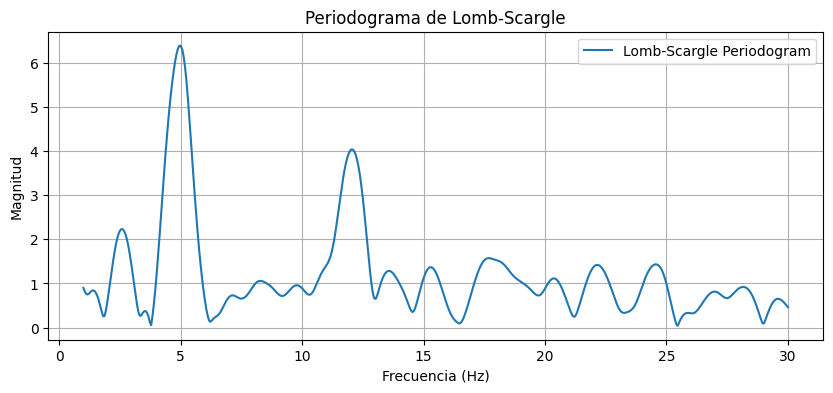

In [4]:
# Crear una grilla de frecuencias para evaluar
frecuencias = np.linspace(1, 30, 500)
# El método de lombscargle espera tiempo y frecuencia en radianes
frecuencias_rad = 2 * np.pi * frecuencias
potencia = lombscargle(t_no_uniforme, x_no_uniforme, frecuencias_rad)

# Visualizar el periodograma
plt.figure(figsize=(10, 4))
plt.plot(frecuencias, np.sqrt(potencia), label='Lomb-Scargle Periodogram')
plt.title("Periodograma de Lomb-Scargle")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()
plt.show()


## Reconstrucción de la señal

Después de aplicar la FFT sobre la señal interpolada, podemos reconstruir una versión aproximada de la señal original usando la Transformada Inversa de Fourier (iFFT).


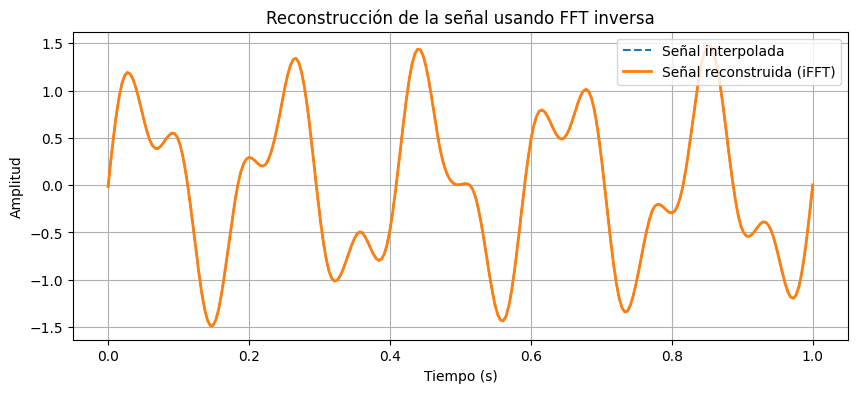

In [5]:
# Reconstrucción de la señal a partir del espectro (FFT inversa)
x_reconstruida = np.fft.ifft(X_fft).real  # Tomamos solo la parte real (la imaginaria es numéricamente casi cero)

# Graficar la señal interpolada y la reconstruida
plt.figure(figsize=(10, 4))
plt.plot(t_uniforme, x_interpolada, label='Señal interpolada', linestyle='--')
plt.plot(t_uniforme, x_reconstruida, label='Señal reconstruida (iFFT)', linewidth=2)
plt.title("Reconstrucción de la señal usando FFT inversa")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


## Conclusión

- La interpolación + FFT es útil cuando los datos están "casi" uniformemente espaciados.
- El método de Lomb-Scargle es ideal para datos verdaderamente irregulares, como señales adquiridas en sistemas asincrónicos, astronomía, etc.
- Ambos métodos identifican correctamente las frecuencias dominantes de la señal.

Puedes adaptar este notebook para tus propios datos experimentales. ¡Buena suerte en el curso!
